In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'C:/Users/Lenovo/Downloads/model2.csv'
data2 = pd.read_csv(file_path)

data2.head()

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,on_base_percent,b_walkoff,iz_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,whiff_percent,swing_percent
0,"Cabrera, Miguel",408234,2021,526,22.4,7.6,0.316,1,69.1,30.2,57.1,82.0,25.8,49.4
1,"Molina, Yadier",425877,2021,473,16.7,5.1,0.297,2,76.0,38.9,63.3,82.7,24.0,57.1
2,"Cruz Jr., Nelson",443558,2021,584,21.6,8.7,0.334,1,73.8,31.0,52.6,77.3,30.7,51.0
3,"Peralta, David",444482,2021,538,17.1,8.6,0.325,1,66.3,27.4,59.6,86.6,21.3,46.5
4,"Escobar, Alcides",444876,2021,349,16.0,4.9,0.340,1,69.2,35.5,64.1,83.5,21.6,52.1


In [2]:
# No missing data
missing_data = data2.isnull().sum()
missing_data

last_name, first_name    0
player_id                0
year                     0
pa                       0
k_percent                0
bb_percent               0
on_base_percent          0
b_walkoff                0
iz_swing_percent         0
oz_swing_percent         0
oz_contact_percent       0
iz_contact_percent       0
whiff_percent            0
swing_percent            0
dtype: int64

In [3]:
# Getting rid of columns we don't need
data2 = data2.drop(columns=['last_name, first_name', 'year', 'pa'], errors='ignore')

In [4]:
# 'b_walkoff' 변수 제외한 나머지 변수들을 모두 변수선택
columns_of_interest = ['k_percent', 'bb_percent', 'on_base_percent', 
                       'iz_swing_percent', 'oz_swing_percent', 'oz_contact_percent',
                       'iz_contact_percent', 'whiff_percent', 'swing_percent']

# Subsetting the data to these columns
selected_data = data2[columns_of_interest]

# Displaying a snapshot of selected columns to confirm selection
selected_data.head()

,k_percent,bb_percent,on_base_percent,iz_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,whiff_percent,swing_percent
0,22.4,7.6,0.316,69.1,30.2,57.1,82.0,25.8,49.4
1,16.7,5.1,0.297,76.0,38.9,63.3,82.7,24.0,57.1
2,21.6,8.7,0.334,73.8,31.0,52.6,77.3,30.7,51.0
3,17.1,8.6,0.325,66.3,27.4,59.6,86.6,21.3,46.5
4,16.0,4.9,0.340,69.2,35.5,64.1,83.5,21.6,52.1


In [5]:
# 각 변수별 상관관계 분석
correlation_matrix = selected_data.corr()

# OBP(출루율)과 다른 변수들의 상관관계 분석 후 상관관계가 높은 순으로 정렬
obp_correlations = correlation_matrix['on_base_percent'].sort_values(ascending=False)
obp_correlations

on_base_percent       1.000000
bb_percent            0.602917
iz_contact_percent    0.177377
oz_contact_percent    0.165520
iz_swing_percent     -0.154903
whiff_percent        -0.221940
k_percent            -0.282074
swing_percent        -0.371455
oz_swing_percent     -0.404955
Name: on_base_percent, dtype: float64

In [6]:
# `selected_data`는 데이터셋에서 추출되었다고 가정
# 이상치 처리 - 1st,99th 백분위수로 제한하여 처리
for column in selected_data.columns:
    lower_bound = np.percentile(selected_data[column], 1)
    upper_bound = np.percentile(selected_data[column], 99)
    selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)

# 이상치 처리 후 요약
selected_data.describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3496\3912988919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3496\3912988919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3496\3912988919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a

,k_percent,bb_percent,on_base_percent,iz_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,whiff_percent,swing_percent
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,21.910644,8.476565,0.321751,68.038190,28.589882,56.958383,82.487299,24.893206,47.889177
std,5.716803,2.801871,0.032644,5.519026,5.813485,9.033539,5.126269,5.924829,4.694694
min,10.017000,3.200000,0.245340,55.217000,16.600000,36.000000,69.534000,11.834000,37.617000
25%,17.725000,6.400000,0.301000,64.200000,24.500000,50.600000,79.100000,20.700000,44.600000
50%,21.600000,8.300000,0.319000,67.900000,28.450000,56.850000,82.700000,24.700000,47.800000
75%,25.800000,10.300000,0.342000,71.900000,32.300000,62.800000,86.100000,29.000000,51.000000
max,35.183000,15.900000,0.408000,81.166000,43.949000,77.381000,92.966000,38.883000,59.483000


In [7]:
# 상관관계 높은 변수끼리 출력
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

k_percent         whiff_percent       0.885503
iz_swing_percent  swing_percent       0.856047
oz_swing_percent  swing_percent       0.869145
whiff_percent     k_percent           0.885503
swing_percent     iz_swing_percent    0.856047
                  oz_swing_percent    0.869145
dtype: float64

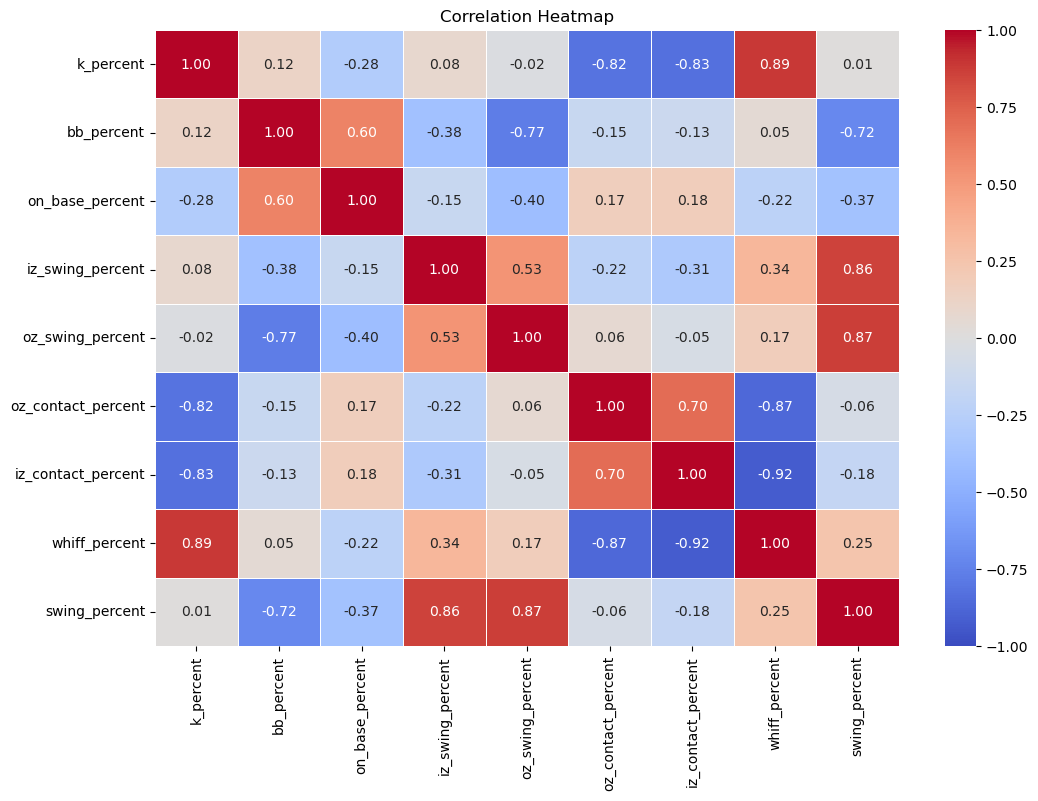

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()   

In [9]:
# 스윙률 변수 삭제 후 상관분석
selected_data = selected_data.drop(columns=['swing_percent'])
correlation_matrix = selected_data.corr()
obp_correlations = correlation_matrix['on_base_percent'].sort_values(ascending=False)
obp_correlations

on_base_percent       1.000000
bb_percent            0.590737
iz_contact_percent    0.178751
oz_contact_percent    0.169108
iz_swing_percent     -0.152172
whiff_percent        -0.222827
k_percent            -0.283637
oz_swing_percent     -0.402165
Name: on_base_percent, dtype: float64

In [10]:
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

k_percent      whiff_percent    0.883436
whiff_percent  k_percent        0.883436
dtype: float64

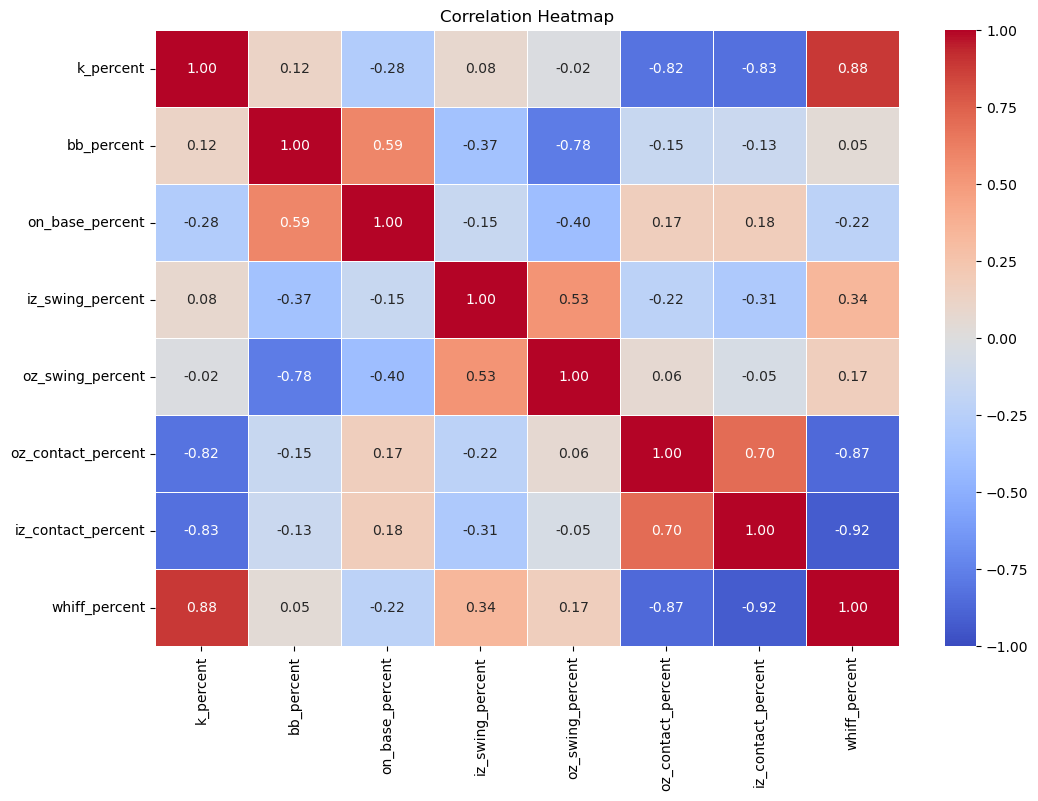

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# Scaling
# Define lists of proportion-based and numeric features
proportion_features = ["k_percent", "bb_percent", 
                       "iz_swing_percent", "oz_swing_percent", "oz_contact_percent",
                       "iz_contact_percent", "whiff_percent"]
numeric_features = selected_data.select_dtypes(include=[float, int]).columns.difference(['on_base_percent'] + proportion_features)

# Initialize scalers
standard_scaler = StandardScaler()

# Apply StandardScaler to proportion-based features
selected_data[proportion_features] = standard_scaler.fit_transform(selected_data[proportion_features])

Cross-validation Accuracy Scores: [0.73214286 0.75892857 0.70982143 0.75336323 0.7309417 ]
Mean Accuracy: 0.7370395579756566
Accuracy: 0.6919642857142857

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       110
           1       0.70      0.70      0.70       114

    accuracy                           0.69       224
   macro avg       0.69      0.69      0.69       224
weighted avg       0.69      0.69      0.69       224



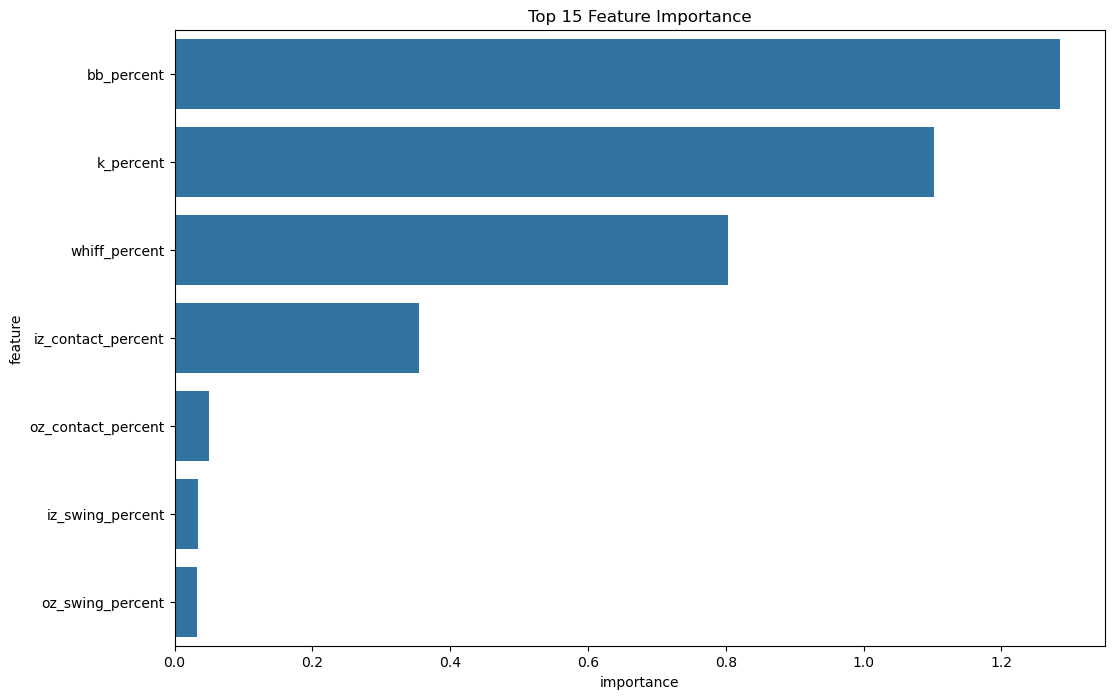

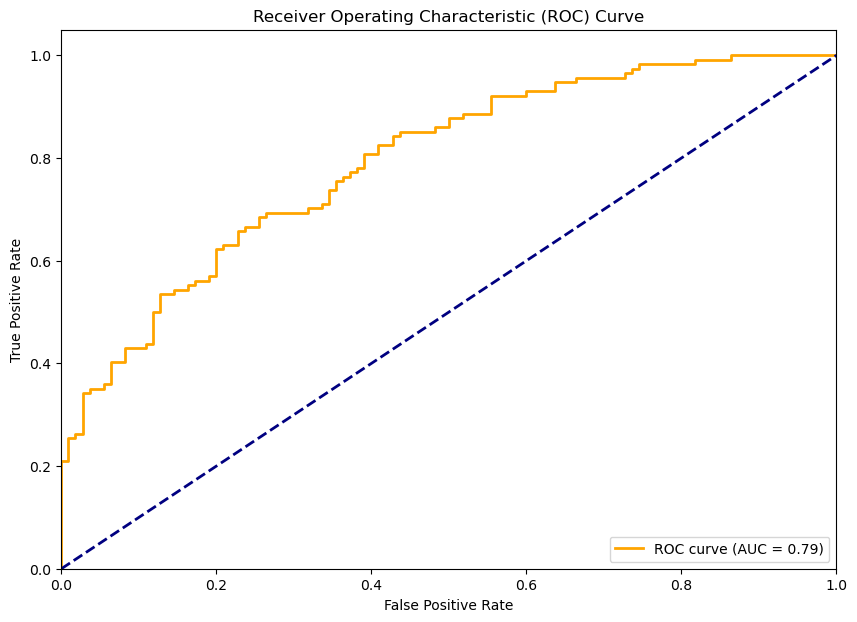

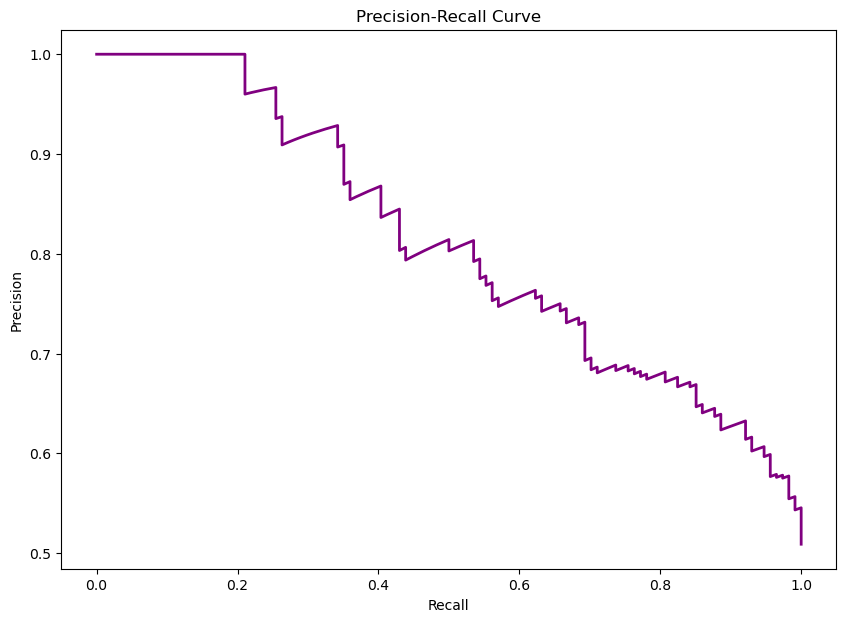

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve 

# 'on_base_percent'를 기준으로 이진 분류 타겟 생성 (중앙값 기준)
base_median = selected_data['on_base_percent'].median()
selected_data['high_base'] = (selected_data['on_base_percent'] > base_median).astype(int)

# 특성과 타겟 분리
X = selected_data.drop(['on_base_percent', 'high_base'], axis=1)
y = selected_data['high_base']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 (L2 정규화)
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_test, y_test)

# 교차 검증을 통한 성능 평가
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# 특성 중요도 시각화
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.show()

# ROC 곡선
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [24]:
# Calculate the proportion of each feature's importance relative to the total importance
feature_importance['importance_ratio'] = feature_importance['importance'] / feature_importance['importance'].sum()

# Display the updated feature importance with ratios in percentage format
feature_importance['importance_ratio'] = feature_importance['importance_ratio'] * 100  # Convert to percentage

print(feature_importance.head(15))

              feature  importance  importance_ratio
1          bb_percent    1.285393         35.099894
0           k_percent    1.102235         30.098457
6       whiff_percent    0.803747         21.947713
5  iz_contact_percent    0.355039          9.694945
4  oz_contact_percent    0.050094          1.367891
2    iz_swing_percent    0.033664          0.919245
3    oz_swing_percent    0.031928          0.871854
